In [57]:
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from imutils import paths
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import softmax
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [58]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [59]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#**Fetching**

In [60]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 130, 130, 40, 40)
  data_cropped.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

Loaded FR0... 6066 files has loaded.


In [61]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 130, 130, 40, 40)
  data_cropped.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [62]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/Temp/Data-Mining/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 130, 130, 40, 40)
  data_cropped.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#**EDA**

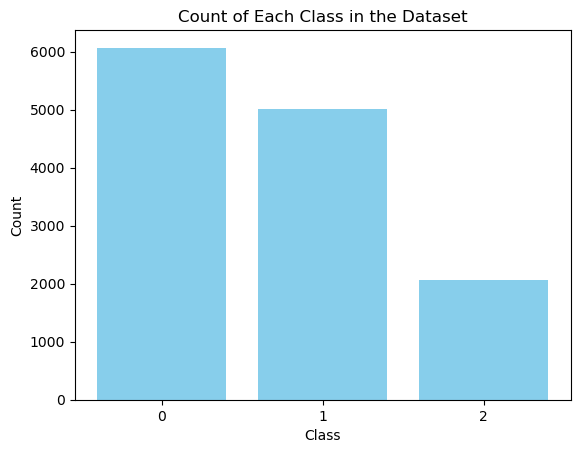

In [63]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [64]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

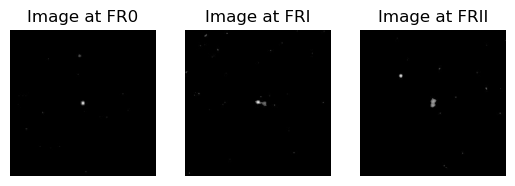

In [65]:
image = np.squeeze(data[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

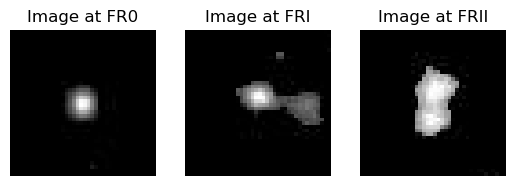

In [66]:
image = np.squeeze(data_cropped[0])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data_cropped[6066])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data_cropped[11075])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

#Filterring

In [67]:
type(data_cropped), type(labels), data_cropped.shape, labels.shape

(numpy.ndarray, numpy.ndarray, (13140, 40, 40, 1), (13140,))

In [68]:
mask = np.array([np.max(image) >= 100 for image in data_cropped])
filtered_data = data_cropped[mask]
filtered_labels = labels[mask]

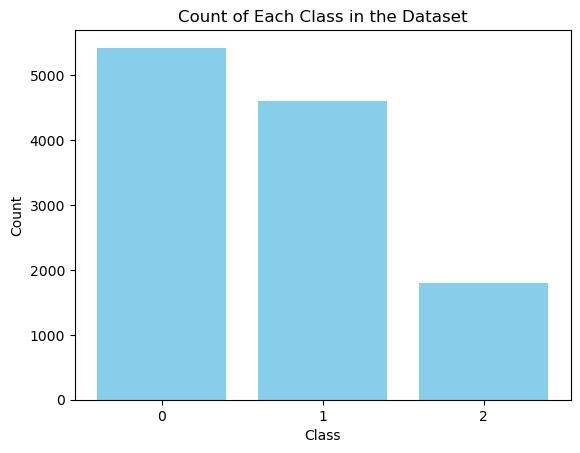

In [70]:
counter = Counter(filtered_labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [71]:
data.shape, data_cropped.shape, filtered_data.shape, filtered_labels.shape


((13140, 300, 300, 1), (13140, 40, 40, 1), (11822, 40, 40, 1), (11822,))

In [72]:
np.min(data_cropped[0]), np.max(data_cropped[0])

(0, 248)

#Augmentation

In [75]:
datagen = ImageDataGenerator(rotation_range=30, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.2, 
                             shear_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')
class_2_data = filtered_data[filtered_labels == 2]
class_1_data = filtered_data[filtered_labels == 1]
class_0_data = filtered_data[filtered_labels == 0]



augmented_class_2_data = []
augmented_class_2_labels = []

for i in range(9000):
    image = class_2_data[np.random.randint(0, len(class_2_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_2_data.append(augmented_image)
    augmented_class_2_labels.append(2)



augmented_class_1_data = []
augmented_class_1_labels = []

for i in range(6000):
    image = class_1_data[np.random.randint(0, len(class_1_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_1_data.append(augmented_image)
    augmented_class_1_labels.append(1)


augmented_class_0_data = []
augmented_class_0_labels = []

for i in range(5000):
    image = class_0_data[np.random.randint(0, len(class_0_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_0_data.append(augmented_image)
    augmented_class_0_labels.append(0)


In [76]:
augmented_class_2_data = np.array(augmented_class_2_data)
augmented_class_2_labels = np.array(augmented_class_2_labels)

augmented_class_1_data = np.array(augmented_class_1_data)
augmented_class_1_labels = np.array(augmented_class_1_labels)

augmented_class_0_data = np.array(augmented_class_0_data)
augmented_class_0_labels = np.array(augmented_class_0_labels)

final_data = np.concatenate((data_cropped, augmented_class_2_data, augmented_class_1_data, augmented_class_0_data), axis=0)
final_labels = np.concatenate((labels, augmented_class_2_labels, augmented_class_1_labels, augmented_class_0_labels), axis=0)

In [77]:
print("Final data shape:", augmented_class_1_data.shape)
print("Final labels shape:", augmented_class_2_data.shape)
print("Final data shape:", final_data.shape)
print("Final labels shape:", final_labels.shape)

Final data shape: (6000, 40, 40, 1)
Final labels shape: (9000, 40, 40, 1)
Final data shape: (33140, 40, 40, 1)
Final labels shape: (33140,)


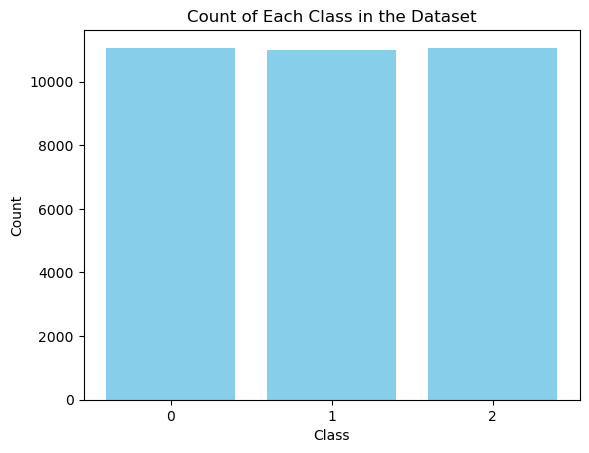

In [78]:
counter = Counter(final_labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

#**Preprocessing**

In [79]:
data_normalized = final_data / 255

In [80]:
print(f'Min of original = {np.min(final_data[0])}')
print(f'Max of original = {np.max(final_data[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 248
Min of original = 0.0
Max of original = 0.9725490196078431


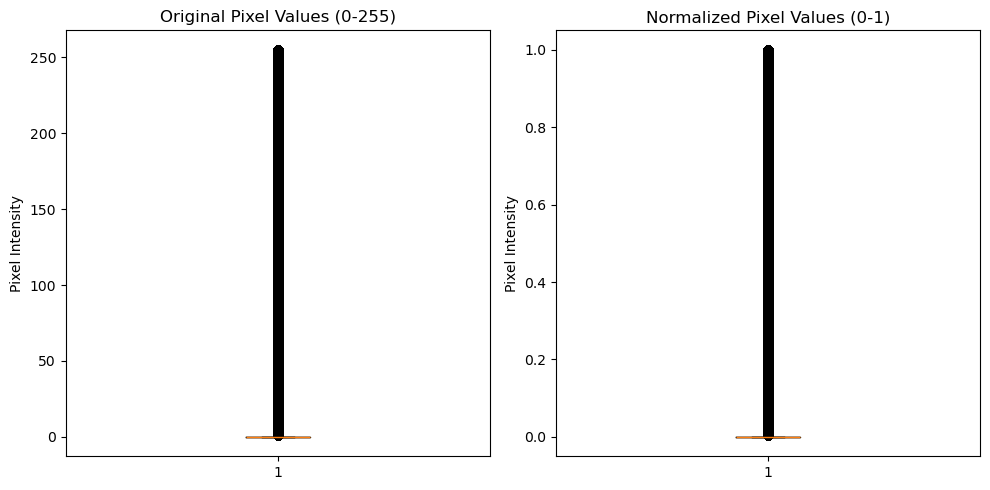

In [81]:
cropped_flat = final_data.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#**Splitting**

In [82]:
x = data_normalized
y = final_labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23198, 40, 40, 1), (23198,), (9942, 40, 40, 1), (9942,))

#**CNN**

In [111]:
model_cnn = keras.Sequential()
model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(40, 40, 1)))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))




model_cnn.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))


#Model Compiling
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = [keras.metrics.CategoricalAccuracy()]

model_cnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Builing and Summury
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 38, 38, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [112]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [113]:
start = time.perf_counter()
hist = model_cnn.fit(x_train, y_train, batch_size=512, epochs=200, validation_data=(x_test, y_test), callbacks=[early_stopping])
end = time.perf_counter()

Epoch 1/200
46/46 [==============================] - 5s 100ms/step - loss: 1.0995 - accuracy: 0.3345 - val_loss: 1.0984 - val_accuracy: 0.3465
Epoch 2/200
46/46 [==============================] - 4s 95ms/step - loss: 1.0986 - accuracy: 0.3393 - val_loss: 1.0982 - val_accuracy: 0.3633
Epoch 3/200
46/46 [==============================] - 4s 95ms/step - loss: 1.0988 - accuracy: 0.3338 - val_loss: 1.0979 - val_accuracy: 0.3764
Epoch 4/200
46/46 [==============================] - 4s 95ms/step - loss: 1.0983 - accuracy: 0.3362 - val_loss: 1.0977 - val_accuracy: 0.3854
Epoch 5/200
46/46 [==============================] - 4s 95ms/step - loss: 1.0980 - accuracy: 0.3374 - val_loss: 1.0973 - val_accuracy: 0.3800
Epoch 6/200
46/46 [==============================] - 4s 95ms/step - loss: 1.0979 - accuracy: 0.3388 - val_loss: 1.0969 - val_accuracy: 0.3730
Epoch 7/200
46/46 [==============================] - 4s 95ms/step - loss: 1.0971 - accuracy: 0.3449 - val_loss: 1.0963 - val_accuracy: 0.3722
Epoch

In [114]:
(end - start)/ 60

14.642526537750019

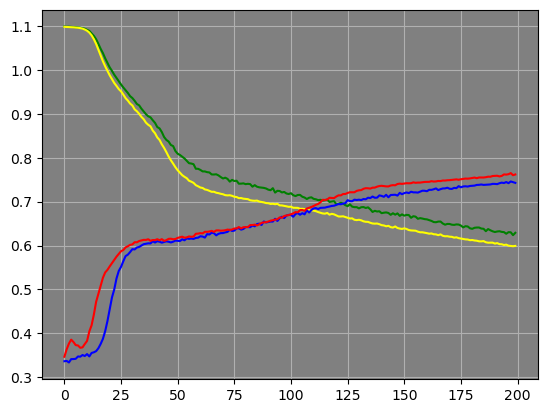

In [115]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='green', label='Train loss')
plt.plot(loss_test, color='yellow', label='Test loss')
plt.plot(acc_train, color='blue', label='Train acc')
plt.plot(acc_test, color='red', label='Test acc')


plt.show()

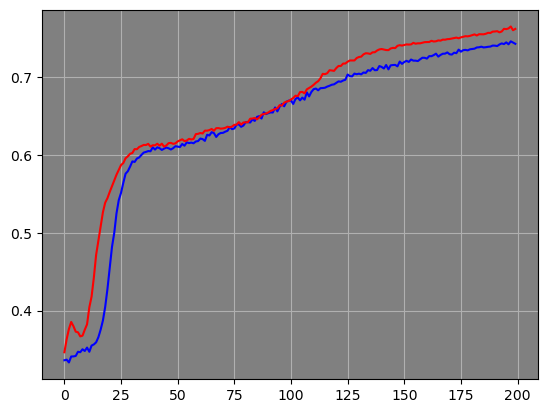

In [125]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(acc_train, color='blue', label='Train acc');
plt.plot(acc_test, color='red', label='Test acc');


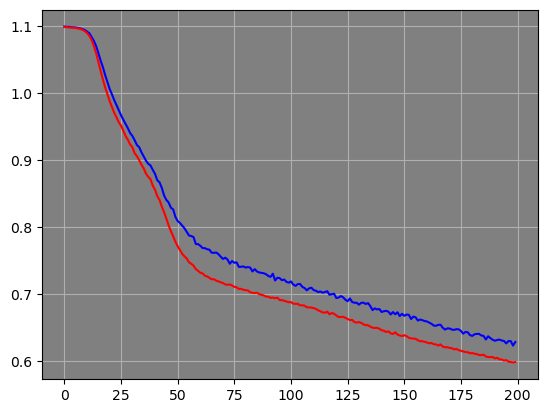

In [117]:
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='blue', label='Train loss');
plt.plot(loss_test, color='red', label='Test loss');



In [118]:
y_pred_train = model_cnn.predict(x_train)
y_pred_test = model_cnn.predict(x_test)


index_train = random.randint(0, 9198)
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train[index_train]}')

index_test = random.randint(0, 3942)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test[index_test]}')


y_train: 2 y_pred_train:[0.02333781 0.4733338  0.5033284 ]
y_test: 1 y_pred_test:[0.07729399 0.69923234 0.22347361]


In [119]:

y_pred_train_smax = softmax(y_pred_train, axis=1)
y_pred_test_smax = softmax(y_pred_test, axis=1)
 
y_pred_train_smax = np.argmax(y_pred_train_smax, axis=1)
y_pred_test_smax = np.argmax(y_pred_test_smax, axis=1)


y_pred_test_smax.shape, y_pred_train_smax.shape

((9942,), (23198,))

In [120]:
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train_smax[index_train]}')

index_test = random.randint(0, 3948)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test_smax[index_test]}')

y_train: 2 y_pred_train:2
y_test: 2 y_pred_test:1


In [121]:

acc_train = accuracy_score(y_train, y_pred_train_smax)
acc_test = accuracy_score(y_test, y_pred_test_smax)

p = precision_score(y_test, y_pred_test_smax, average='micro')
r = recall_score(y_test, y_pred_test_smax, average='micro')


print(f'Acc Train: {acc_train} - Acc Test: {acc_test} - Percision: {p} - Recall: {r}')

Acc Train: 0.769678420553496 - Acc Test: 0.7619191309595654 - Percision: 0.7619191309595654 - Recall: 0.7619191309595654


In [122]:
model_cnn.evaluate(x=x_test, y=y_test)
model_cnn.evaluate(x=x_train, y=y_train)

725/725 [==============================] - 5s 6ms/step - loss: 0.5745 - accuracy: 0.7697


[0.5744905471801758, 0.7696784138679504]

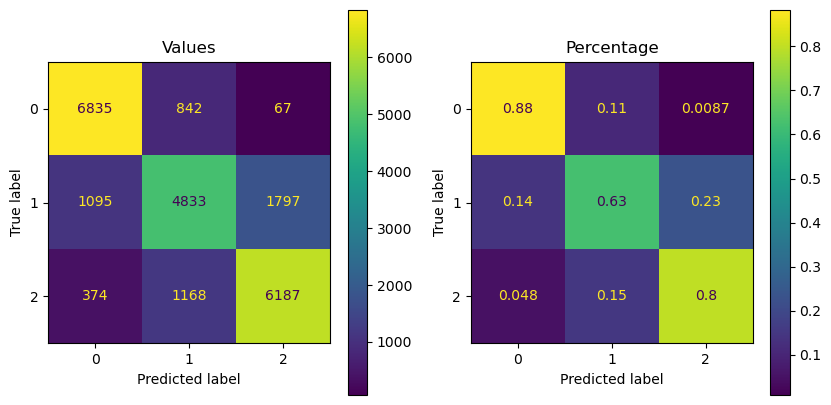

In [123]:
cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_smax)
disp_cm_train = ConfusionMatrixDisplay(cm_train)

cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
disp_cm_train_perce = ConfusionMatrixDisplay(cm_train)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_train.plot(ax=ax1);
disp_cm_train_perce.plot(ax=ax2);

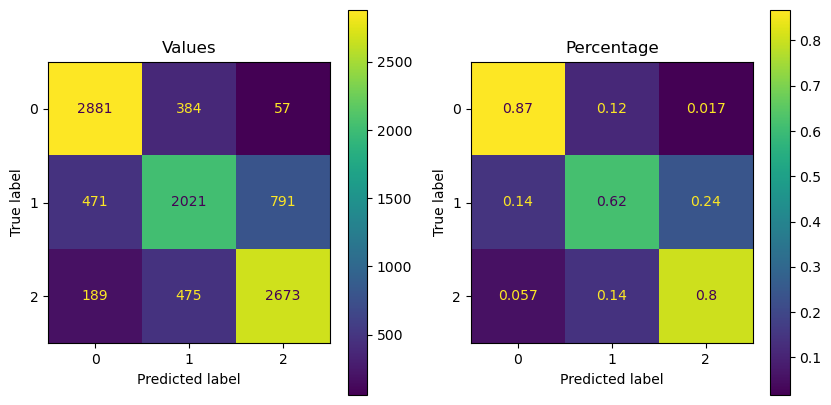

In [124]:
cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_smax)
disp_cm_test = ConfusionMatrixDisplay(cm_test)

cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
disp_cm_test_perce = ConfusionMatrixDisplay(cm_test)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_test.plot(ax=ax1);
disp_cm_test_perce.plot(ax=ax2);